In [52]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import datetime

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [2]:
#Read csv file
data = pd.read_csv("data.csv")

In [3]:
#See what's inside
data

,DATE,index,RP_ENTITY_ID,GLOBAL_ALL,GLOBAL_HEAD,GLOBAL_BODY,GLOBAL_ALL_SG90,GLOBAL_HEAD_SG90,GLOBAL_BODY_SG90,GLOBAL_ALL_SG365,...,GROUP_E_BODY,GROUP_E_ALL_SG90,GROUP_E_HEAD_SG90,GROUP_E_BODY_SG90,GROUP_E_ALL_SG365,GROUP_E_HEAD_SG365,GROUP_E_BODY_SG365,GROUP_AM_BODY,T0_RETURN,T1_RETURN
0,2005-01-03,0,0157B1,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,...,0.610000,0.610000,NaN,0.610000,0.610000,NaN,0.610000,0.610000,0.018520,-0.037526
1,2005-01-03,1,046263,0.010000,0.010000,NaN,0.010000,0.010000,NaN,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001415,0.007740
2,2005-01-03,2,07CA6A,0.633333,0.633333,NaN,0.660000,0.660000,NaN,0.700000,...,NaN,0.700000,0.700000,NaN,0.700000,0.700000,NaN,NaN,-0.005460,0.008110
3,2005-01-03,3,0BC29E,0.550000,NaN,0.550000,0.550000,NaN,0.550000,0.550000,...,0.550000,NaN,NaN,NaN,NaN,NaN,NaN,0.550000,0.018809,0.019265
4,2005-01-03,4,0BC6D8,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002185,0.008238
5,2005-01-03,5,0BE0AE,0.620000,0.620000,NaN,0.620000,0.620000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,0.002435
6,2005-01-03,6,0D920D,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,-0.002242,0.006588
7,2005-01-03,7,1921DD,0.532000,0.532000,NaN,0.500000,0.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015793,0.003908
8,2005-01-03,8,1A3E1B,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005717,0.017611
9,2005-01-03,9,1FCC00,-0.740000,-0.740000,NaN,-0.740000,-0.740000,NaN,NaN,...,NaN,-0.740000,-0.740000,NaN,NaN,NaN,NaN,NaN,-0.017175,-0.020631


In [223]:
Id='619882'#619882 very populated, 50070E also very populated, D25249 not much populated, 5D0EAE two points..
#set date as index
data.index
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.set_index('DATE')

In [224]:
subdata = data[data.RP_ENTITY_ID==Id]
date_start = '2013-01-01'
date_split   = '2016-01-01'
date_end   = '2017-02-17'
train = subdata[date_start:date_split]
test = subdata[date_split:date_end]

In [225]:
train

,level_0,index,RP_ENTITY_ID,GLOBAL_ALL,GLOBAL_HEAD,GLOBAL_BODY,GLOBAL_ALL_SG90,GLOBAL_HEAD_SG90,GLOBAL_BODY_SG90,GLOBAL_ALL_SG365,...,GROUP_E_BODY,GROUP_E_ALL_SG90,GROUP_E_HEAD_SG90,GROUP_E_BODY_SG90,GROUP_E_ALL_SG365,GROUP_E_HEAD_SG365,GROUP_E_BODY_SG365,GROUP_AM_BODY,T0_RETURN,T1_RETURN
DATE,,,,,,,,,,,,,,,,,,,,,
2013-01-02,380904,380904,619882,0.252963,0.060000,0.476800,0.000000,0.000000,0.000000,0.000000,...,0.476800,NaN,NaN,NaN,NaN,NaN,NaN,0.476800,-0.001122,-0.003399
2013-01-03,381112,381112,619882,0.141482,0.119200,0.177419,0.167333,0.157273,0.195000,0.179286,...,0.177419,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.177419,-0.003399,0.009365
2013-01-04,381369,381369,619882,-0.054130,-0.044667,-0.071875,-0.110588,-0.089231,-0.180000,-0.113333,...,-0.071875,-0.620000,-0.620000,NaN,-0.620000,-0.620000,NaN,-0.071875,0.009365,0.004215
2013-01-07,381632,381632,619882,0.176667,0.000000,0.296800,0.200833,0.000000,0.344286,0.219091,...,0.296800,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.296800,0.004215,0.006196
2013-01-08,381911,381911,619882,0.021786,-0.001159,0.127333,-0.002222,-0.002353,0.000000,0.034839,...,0.127333,0.270000,0.360000,0.000000,0.270000,0.360000,0.000000,0.127333,0.006196,-0.005093
2013-01-09,382223,382223,619882,-0.026769,0.027917,-0.181176,0.005517,0.005926,0.000000,0.006400,...,-0.181176,0.000000,NaN,0.000000,0.000000,NaN,0.000000,-0.181176,-0.005093,0.010587
2013-01-10,382516,382516,619882,0.063864,0.029687,0.155000,0.040000,0.017895,0.180000,0.038571,...,0.155000,NaN,NaN,NaN,NaN,NaN,NaN,0.155000,0.010587,-0.000641
2013-01-11,382810,382810,619882,-0.006286,0.000000,-0.022000,-0.012766,0.000000,-0.066667,-0.013636,...,-0.022000,-0.200000,NaN,-0.200000,-0.300000,NaN,-0.300000,-0.022000,-0.000641,-0.006900
2013-01-14,383073,383073,619882,0.039447,0.000000,0.072018,0.062500,0.000000,0.357143,0.071429,...,0.072018,NaN,NaN,NaN,NaN,NaN,NaN,0.072018,-0.006900,0.005111


In [227]:
train.fillna(0.0, inplace=True)
test.fillna(0.0, inplace=True)

In [244]:
features = [column for column in subdata.columns]
train_features = np.delete(features, [0,1,2,32,33])
train_features.shape

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


(29,)

In [229]:
X_train = train[train_features].values
Y_train = train.T1_RETURN.values
X_test = test[train_features].values
Y_test = test.T1_RETURN.values

In [249]:
regressors = {
    'LinearRegression' : LinearRegression(normalize=True),
    'SVR' : svm.SVR(kernel='rbf',C=1000,gamma=.1),
    'SGD' : SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
                         loss="squared_loss", penalty=None, shuffle=False, tol=None),
    'KNN' : KNeighborsRegressor(n_neighbors=5),
    'GBR' : GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='ls'),
    'GPR' : GaussianProcessRegressor(kernel= C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
                              n_restarts_optimizer=9),
    'MLP' : MLPRegressor(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
}

def mape(ypred, ytrue):
    """ returns the mean absolute percentage error """
    idx = ytrue != 0.0
    return 100*np.mean(np.abs(ypred[idx]-ytrue[idx])/ytrue[idx])

for i,c in regressors.items():
    print 'fitting -- ', i , 
    c.fit(X_train, Y_train)
    print ' : error is %0.2f%%' % mape(c.predict(X_train),Y_train)

fitting --  KNN  : error is -164.09%
fitting --  MLP  : error is -926.54%
fitting --  GBR  : error is -187.34%
fitting --  LinearRegression  : error is -99.09%
fitting --  SVR  : error is -142.34%
fitting --  SGD  : error is -57.96%
fitting --  GPR  : error is 1.98%


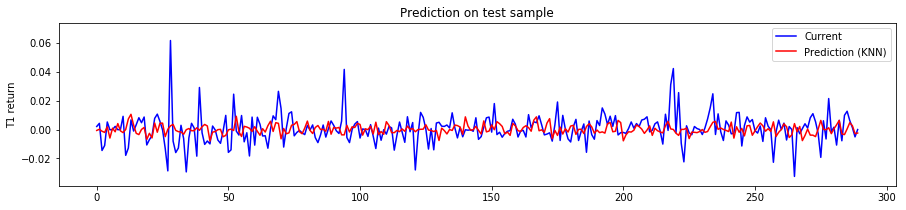

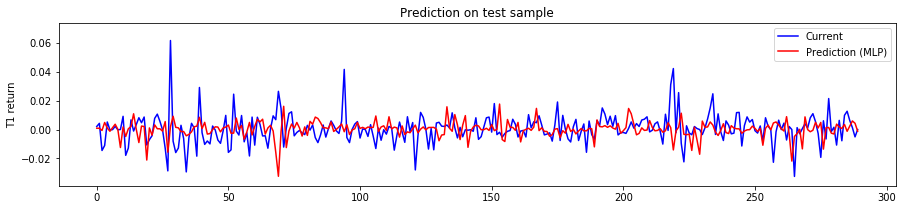

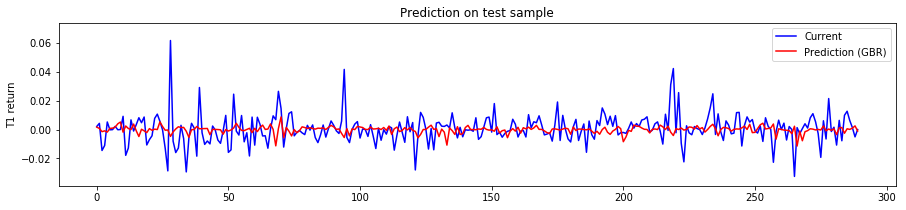

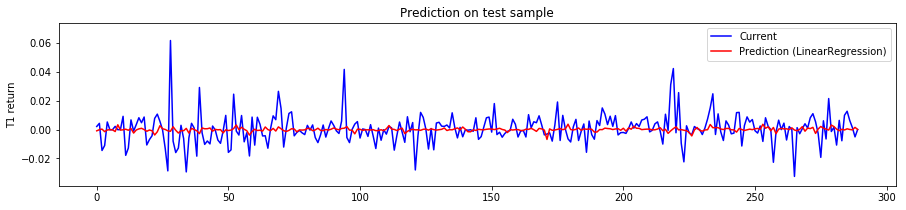

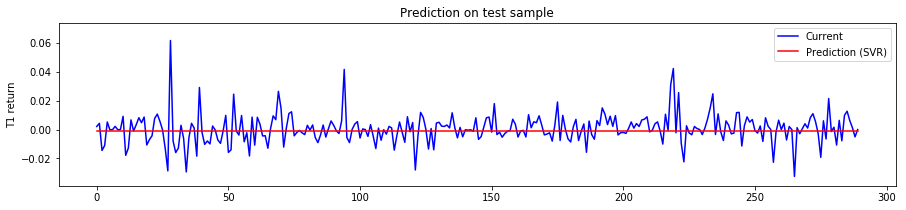

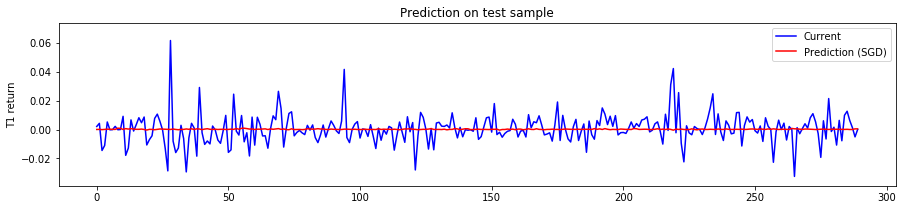

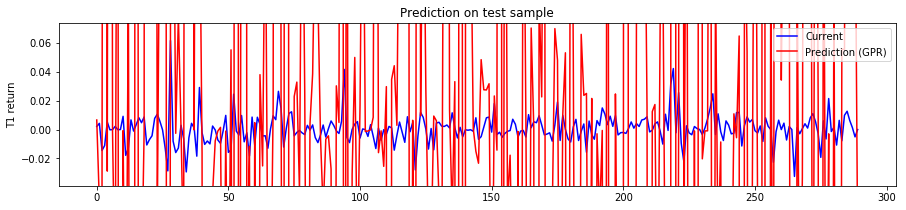

In [248]:
for i,c in regressors.items(): 
    fig, ax = plt.subplots(figsize=(15,3))
    #f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, figsize=(15,6))
    ax.set_title('model : %s' % i)
    ax.plot(Y_test, label='Current', color='blue')
    ax.plot(c.predict(X_test), '-', color='red', label='Prediction (%s)'%i)
    ax.legend(loc='upper right')
    ax.set_ylabel('T1 return')
    ax.set_ylim([Y_test.min()*1.2,Y_test.max()*1.2])
    #ax2.plot((Y_test[-1000:] - c.predict(X_test[-1000:])) , label ='')
    #ax2.set_ylabel('residuals')
    #ax2.set_ylim([-0.02,0.02])
    #f.subplots_adjust(hspace=0)
    plt.title('Prediction on test sample');
    plt.show()

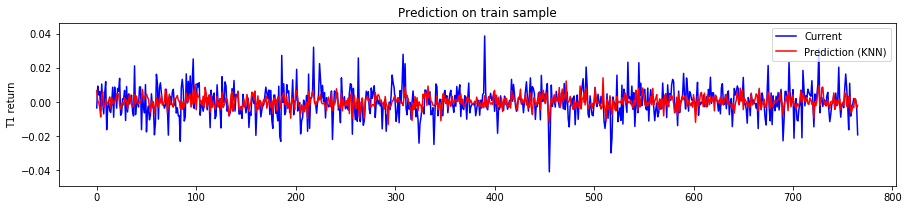

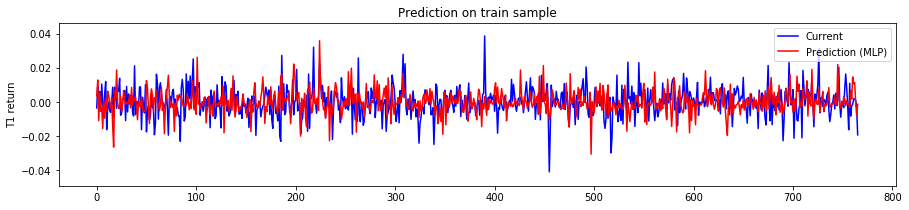

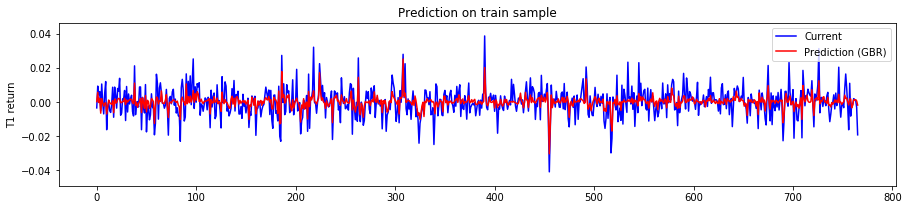

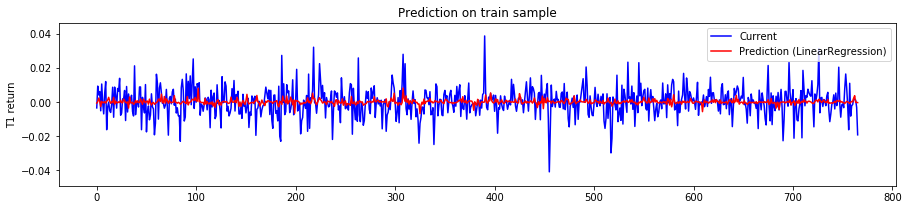

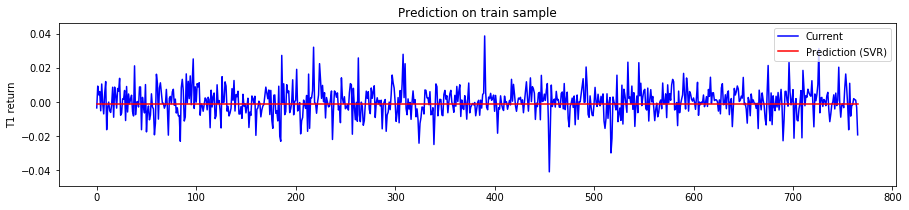

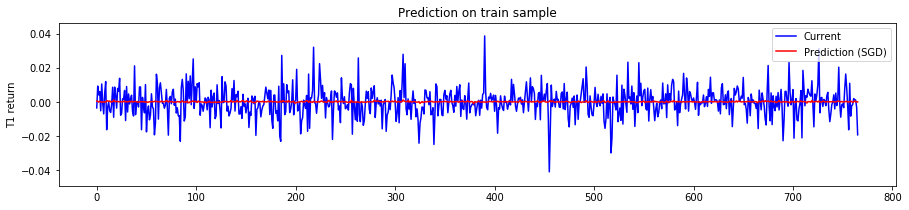

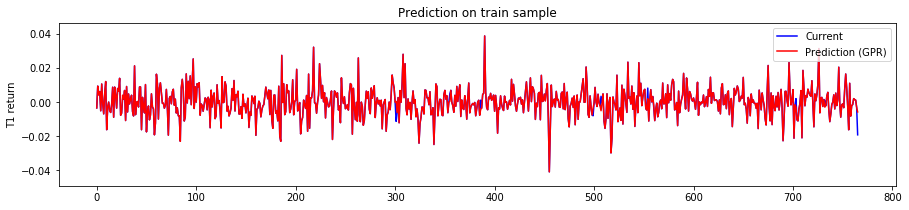

In [243]:
for i,c in regressors.items(): 
    fig, ax = plt.subplots(figsize=(15,3))
    ax.set_title('model : %s' % i)
    ax.plot(Y_train, label='Current', color='blue')
    ax.plot(c.predict(X_train), '-', color='red', label='Prediction (%s)'%i)
    ax.legend(loc='upper right')
    ax.set_ylabel('T1 return')
    ax.set_ylim([Y_train.min()*1.2,Y_train.max()*1.2])
    #ax2.plot((Y_train[-1000:] - c.predict(X_train[-1000:])) , label ='')
    #ax2.set_ylabel('residuals')
    #ax2.set_ylim([-0.02,0.02])
    #f.subplots_adjust(hspace=0)
    plt.title('Prediction on train sample');
    plt.show()

## Prediction files

In [239]:
for i,c in regressors.items(): 
    
    left = train.T1_RETURN.to_frame()
    left.reset_index(inplace=True)
    left['DATE'] = pd.to_datetime(left['DATE'])
    right = pd.DataFrame(c.predict(X_train))
    prediction_train = pd.concat([left,right], axis=1)
    prediction_train.drop_duplicates('DATE')
    prediction_train.columns = ['DATE','T1_RETURN', 'T1_PREDICT']
    prediction_train = prediction_train.set_index('DATE')
    prediction_train.to_csv( './results/train%s.csv'%i)
    
    left = test.T1_RETURN.to_frame()
    left.reset_index(inplace=True)
    left['DATE'] = pd.to_datetime(left['DATE'])
    right = pd.DataFrame(c.predict(X_test))
    prediction_test = pd.concat([left,right], axis=1)
    prediction_test.columns = ['DATE','T1_RETURN', 'T1_PREDICT']
    prediction_test = prediction_test.set_index('DATE')
    prediction_test.to_csv( './results/test%s.csv'%i)   

prediction_test


,T1_RETURN,T1_PREDICT
DATE,,
2016-01-04,0.002133,-2.678557e+02
2016-01-05,0.004284,-3.779480e-21
2016-01-06,-0.014477,-1.026672e-253
2016-01-07,-0.011067,-1.987503e-188
2016-01-08,0.005237,1.085843e-28
2016-01-11,-0.000182,0.000000e+00
2016-01-12,-0.000073,-9.697463e-07
2016-01-13,0.002200,-1.794895e-228
2016-01-14,-0.000145,1.314916e-144
